In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


✅ All libraries imported successfully!
Pandas version: 3.0.0
NumPy version: 2.4.1


In [3]:
# Load the dataset
df = pd.read_csv('../data/creditcard.csv')

# Display basic information
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Total transactions: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")


Dataset loaded successfully!
Shape: (284807, 31)
Total transactions: 284,807
Total features: 31


In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Check column names and data types
print("Column names and data types:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Basic statistics
print("Basic statistics:")
df.describe()

Column names and data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Check the distribution of fraud vs legitimate transactions
print("Class Distribution:")
print(df['Class'].value_counts())
print("\n")

# Calculate percentages
fraud_percentage = (df['Class'].sum() / len(df)) * 100
print(f"Legitimate transactions: {len(df[df['Class']==0]):,} ({100-fraud_percentage:.3f}%)")
print(f"Fraudulent transactions: {len(df[df['Class']==1]):,} ({fraud_percentage:.3f}%)")

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


Legitimate transactions: 284,315 (99.827%)
Fraudulent transactions: 492 (0.173%)


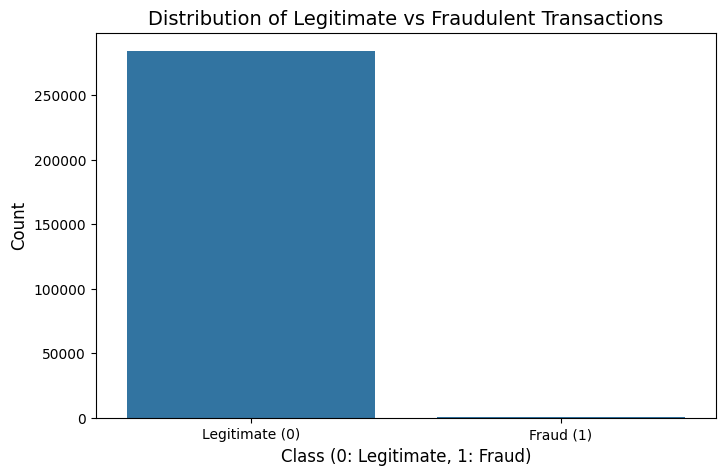

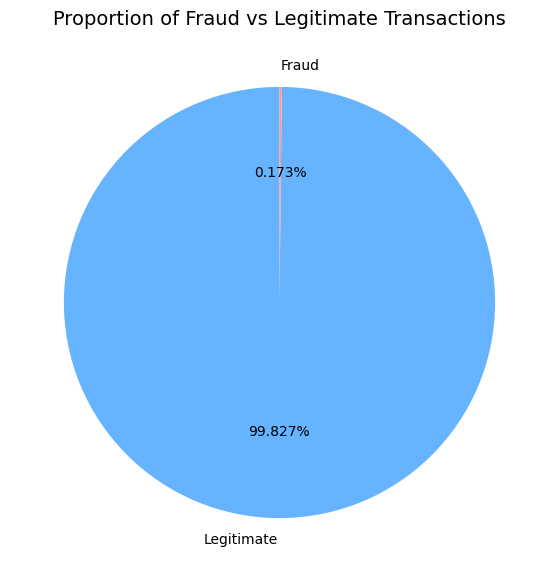

In [7]:
# Create a visualization of class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Legitimate vs Fraudulent Transactions', fontsize=14)
plt.xlabel('Class (0: Legitimate, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Legitimate (0)', 'Fraud (1)'])
plt.show()

# Pie chart for better visualization
plt.figure(figsize=(7, 7))
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=['Legitimate', 'Fraud'], autopct='%1.3f%%', 
        colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Proportion of Fraud vs Legitimate Transactions', fontsize=14)
plt.show()

In [8]:
# Display all column names
print("All features in the dataset:")
print(df.columns.tolist())
print("\n" + "="*50 + "\n")

# Show info about the dataset
print("Dataset Information:")
df.info()

All features in the dataset:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-n

In [9]:
# Compare transaction amounts for fraud vs legitimate
print("Transaction Amount Statistics:\n")
print("Legitimate Transactions:")
print(df[df['Class']==0]['Amount'].describe())
print("\n" + "="*50 + "\n")

print("Fraudulent Transactions:")
print(df[df['Class']==1]['Amount'].describe())


Transaction Amount Statistics:

Legitimate Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


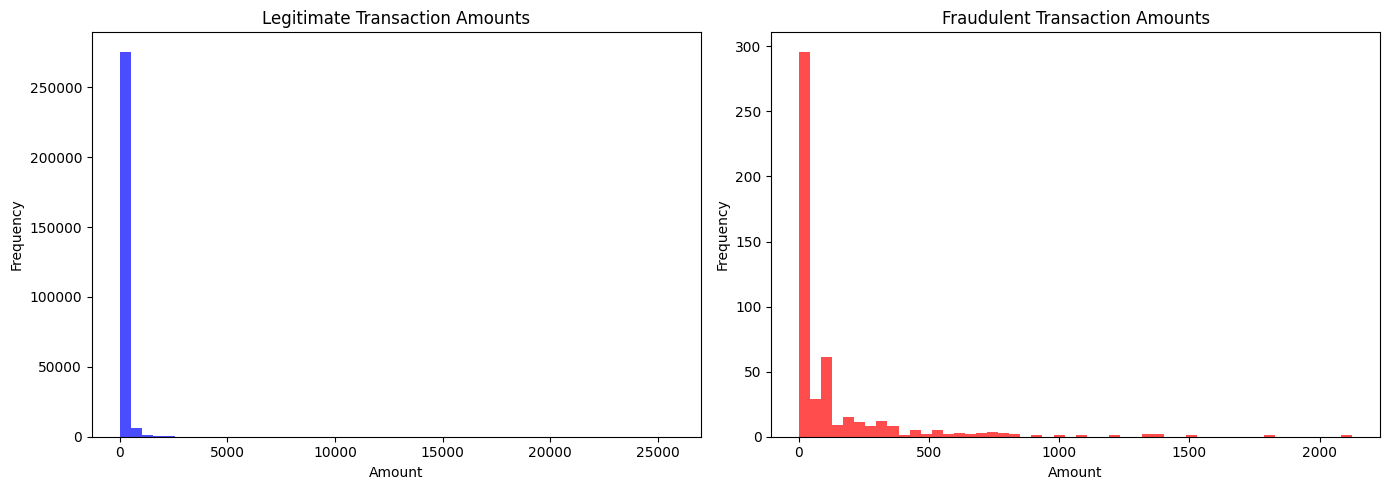

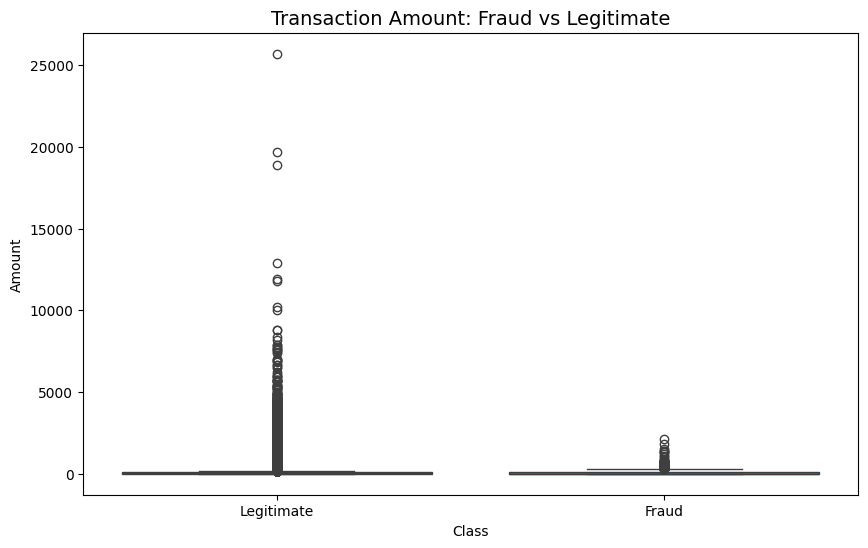

In [10]:
# Visualize amount distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Legitimate transactions
axes[0].hist(df[df['Class']==0]['Amount'], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Legitimate Transaction Amounts', fontsize=12)
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Fraudulent transactions
axes[1].hist(df[df['Class']==1]['Amount'], bins=50, color='red', alpha=0.7)
axes[1].set_title('Fraudulent Transaction Amounts', fontsize=12)
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount: Fraud vs Legitimate', fontsize=14)
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../data/creditcard.csv')

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")

✅ Dataset loaded successfully!
Shape: (284807, 31)


In [5]:
# Calculate correlation of all features with Class (fraud)
correlations = df.corr()['Class'].drop('Class').sort_values(ascending=False)

print("Top 10 features positively correlated with Fraud:")
print(correlations.head(10))
print("\n" + "="*60 + "\n")

print("Top 10 features negatively correlated with Fraud:")
print(correlations.tail(10))

Top 10 features positively correlated with Fraud:
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64


Top 10 features negatively correlated with Fraud:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


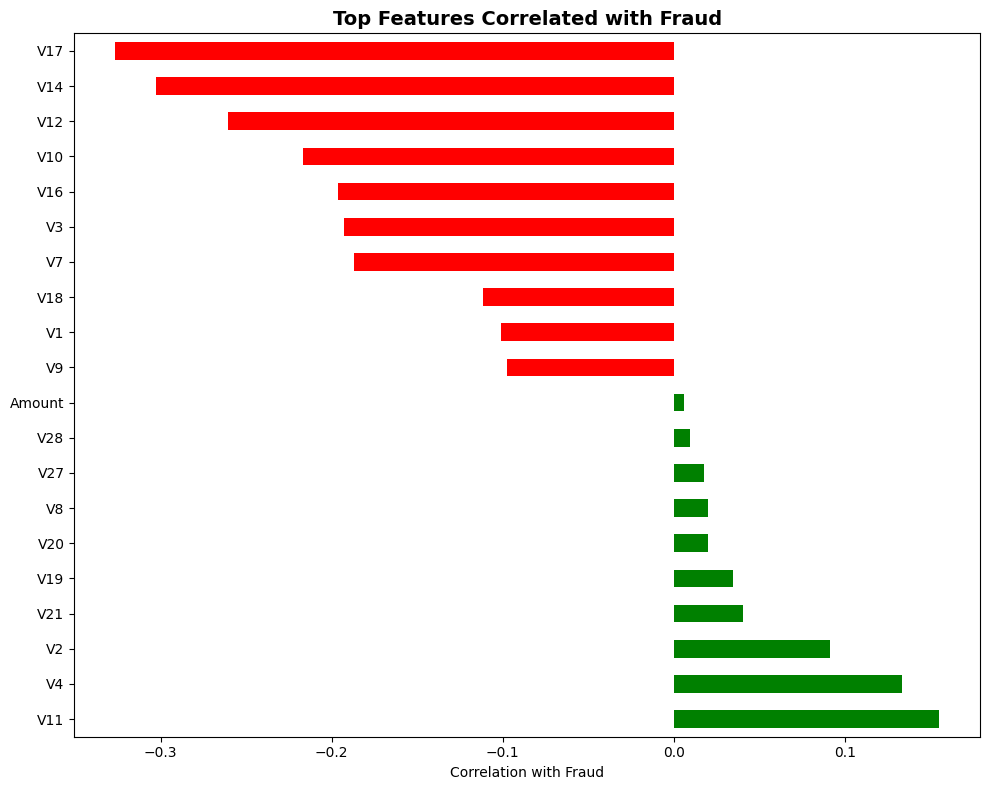

In [6]:
# Visualize correlations
plt.figure(figsize=(10, 8))

# Get top 15 correlations (positive and negative)
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])

# Create bar plot
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
top_corr.plot(kind='barh', color=colors, figsize=(10, 8))
plt.title('Top Features Correlated with Fraud', fontsize=14, fontweight='bold')
plt.xlabel('Correlation with Fraud')
plt.tight_layout()
plt.show()

In [7]:
# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())

Features shape: (284807, 30)
Target shape: (284807,)

Target distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
# Import scaler
from sklearn.preprocessing import StandardScaler

# The V1-V28 features are already scaled (from PCA)
# We only need to scale 'Time' and 'Amount'

scaler = StandardScaler()

# Scale Amount and Time
X['scaled_amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['scaled_time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))

# Drop original Amount and Time
X = X.drop(['Amount', 'Time'], axis=1)

print("✅ Features scaled successfully!")
print(f"Updated features shape: {X.shape}")
print("\nFirst few rows after scaling:")
X.head()

✅ Features scaled successfully!
Updated features shape: (284807, 30)

First few rows after scaling:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,  # 30% for testing
    random_state=42,  # For reproducibility
    stratify=y  # Maintain fraud ratio
)

print("✅ Data split completed!")
print(f"\nTraining set: {X_train.shape[0]:,} transactions")
print(f"Testing set: {X_test.shape[0]:,} transactions")
print(f"\nTraining set fraud distribution:")
print(y_train.value_counts())
print(f"\nTest set fraud distribution:")
print(y_test.value_counts())

✅ Data split completed!

Training set: 199,364 transactions
Testing set: 85,443 transactions

Training set fraud distribution:
Class
0    199020
1       344
Name: count, dtype: int64

Test set fraud distribution:
Class
0    85295
1      148
Name: count, dtype: int64


In [10]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Logistic Regression model
print("Training Logistic Regression model...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

print("✅ Model trained successfully!")
print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy*100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))

Training Logistic Regression model...
✅ Model trained successfully!

MODEL PERFORMANCE

Accuracy: 99.92%

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     85295
       Fraud       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



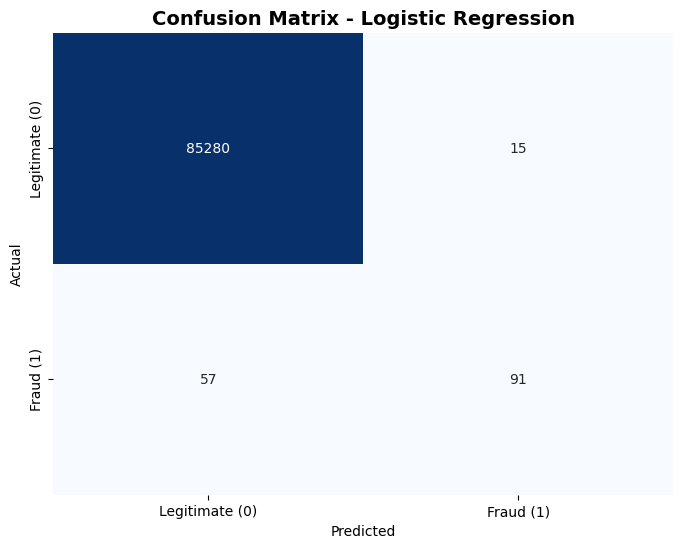


Confusion Matrix Breakdown:
True Negatives (Correctly predicted legitimate): 85,280
False Positives (Legitimate predicted as fraud): 15
False Negatives (Fraud predicted as legitimate): 57
True Positives (Correctly predicted fraud): 91


In [11]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['Legitimate (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Legitimate (0)', 'Fraud (1)'])
plt.show()

# Print detailed confusion matrix breakdown
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (Correctly predicted legitimate): {cm[0][0]:,}")
print(f"False Positives (Legitimate predicted as fraud): {cm[0][1]:,}")
print(f"False Negatives (Fraud predicted as legitimate): {cm[1][0]:,}")
print(f"True Positives (Correctly predicted fraud): {cm[1][1]:,}")

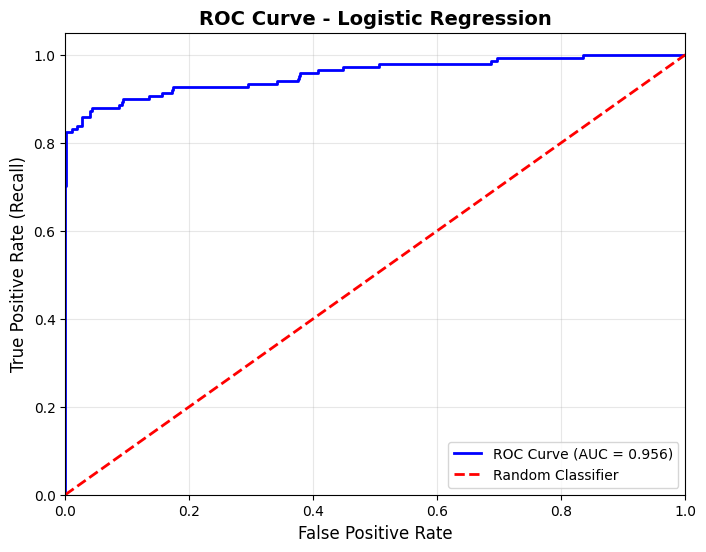


🎯 ROC-AUC Score: 0.9560


In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"\n🎯 ROC-AUC Score: {roc_auc:.4f}")

In [13]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

print("Before SMOTE:")
print(f"Training set fraud distribution:")
print(y_train.value_counts())
print(f"Fraud percentage: {(y_train.sum()/len(y_train))*100:.3f}%")

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\n" + "="*60)
print("After SMOTE:")
print(f"Balanced training set fraud distribution:")
print(y_train_balanced.value_counts())
print(f"Fraud percentage: {(y_train_balanced.sum()/len(y_train_balanced))*100:.3f}%")
print(f"\n✅ SMOTE applied! Training set is now balanced!")

Before SMOTE:
Training set fraud distribution:
Class
0    199020
1       344
Name: count, dtype: int64
Fraud percentage: 0.173%

After SMOTE:
Balanced training set fraud distribution:
Class
0    199020
1    199020
Name: count, dtype: int64
Fraud percentage: 50.000%

✅ SMOTE applied! Training set is now balanced!


In [14]:
# Train Logistic Regression with balanced data
print("Training Logistic Regression with balanced data...")
lr_model_balanced = LogisticRegression(max_iter=1000, random_state=42)
lr_model_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions on test set (original, not balanced!)
y_pred_balanced = lr_model_balanced.predict(X_test)

print("✅ Model trained with balanced data!")
print("\n" + "="*60)
print("MODEL PERFORMANCE (WITH SMOTE)")
print("="*60)

# Accuracy
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"\nAccuracy: {accuracy_balanced*100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced, target_names=['Legitimate', 'Fraud']))

Training Logistic Regression with balanced data...
✅ Model trained with balanced data!

MODEL PERFORMANCE (WITH SMOTE)

Accuracy: 97.73%

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.98      0.99     85295
       Fraud       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



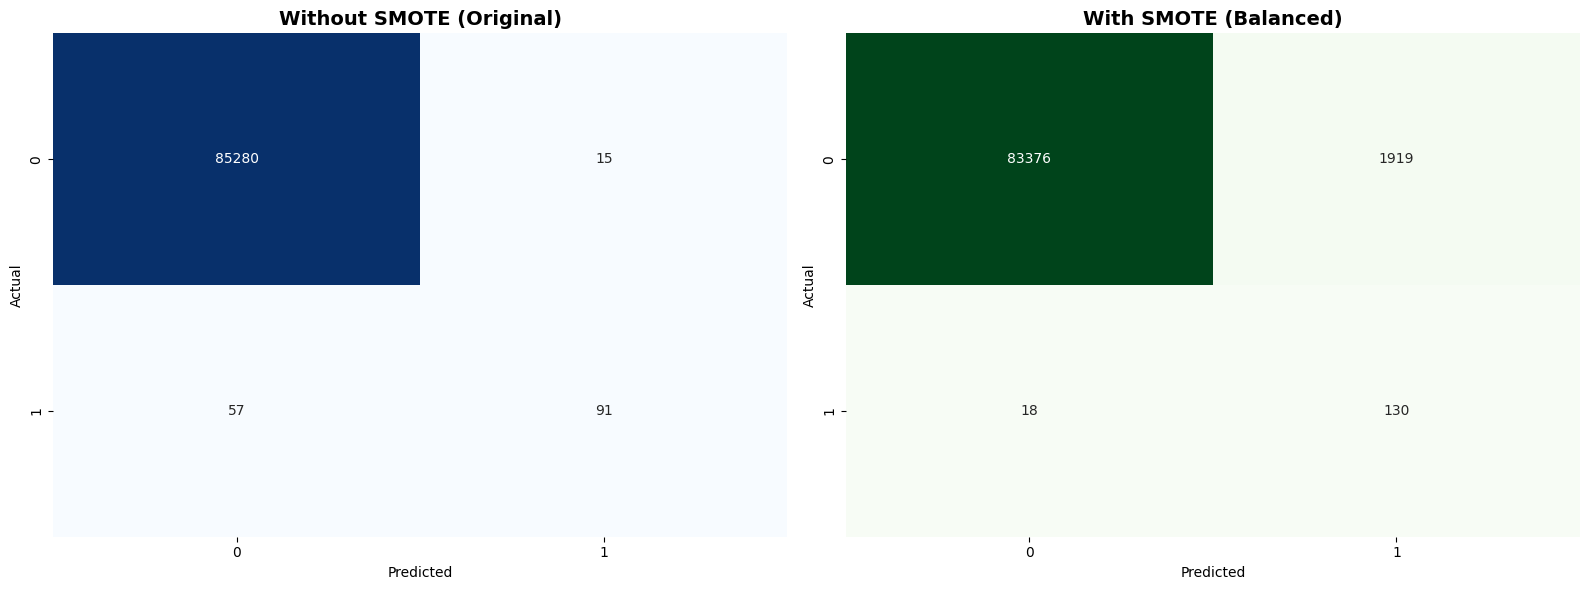


COMPARISON: Without SMOTE vs With SMOTE

Without SMOTE:
  True Positives (Caught frauds): 91
  False Negatives (Missed frauds): 57
  Recall: 61.49%

With SMOTE:
  True Positives (Caught frauds): 130
  False Negatives (Missed frauds): 18
  Recall: 87.84%


In [15]:
# Confusion Matrix for balanced model
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

# Side by side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original model
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Without SMOTE (Original)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Balanced model
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('With SMOTE (Balanced)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Print comparison
print("\n" + "="*60)
print("COMPARISON: Without SMOTE vs With SMOTE")
print("="*60)
print(f"\nWithout SMOTE:")
print(f"  True Positives (Caught frauds): {cm[1][1]}")
print(f"  False Negatives (Missed frauds): {cm[1][0]}")
print(f"  Recall: {cm[1][1]/(cm[1][1]+cm[1][0])*100:.2f}%")

print(f"\nWith SMOTE:")
print(f"  True Positives (Caught frauds): {cm_balanced[1][1]}")
print(f"  False Negatives (Missed frauds): {cm_balanced[1][0]}")
print(f"  Recall: {cm_balanced[1][1]/(cm_balanced[1][1]+cm_balanced[1][0])*100:.2f}%")

In [16]:
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest model with balanced data...")
rf_model = RandomForestClassifier(
    n_estimators=100,  # 100 trees
    max_depth=10,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

rf_model.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_rf = rf_model.predict(X_test)

print("✅ Random Forest trained!")
print("\n" + "="*60)
print("RANDOM FOREST PERFORMANCE")
print("="*60)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy: {accuracy_rf*100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Legitimate', 'Fraud']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(f"True Positives (Caught frauds): {cm_rf[1][1]}")
print(f"False Negatives (Missed frauds): {cm_rf[1][0]}")
print(f"Recall: {cm_rf[1][1]/(cm_rf[1][1]+cm_rf[1][0])*100:.2f}%")

Training Random Forest model with balanced data...
✅ Random Forest trained!

RANDOM FOREST PERFORMANCE

Accuracy: 99.81%

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     85295
       Fraud       0.47      0.81      0.59       148

    accuracy                           1.00     85443
   macro avg       0.73      0.90      0.80     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
True Positives (Caught frauds): 120
False Negatives (Missed frauds): 28
Recall: 81.08%


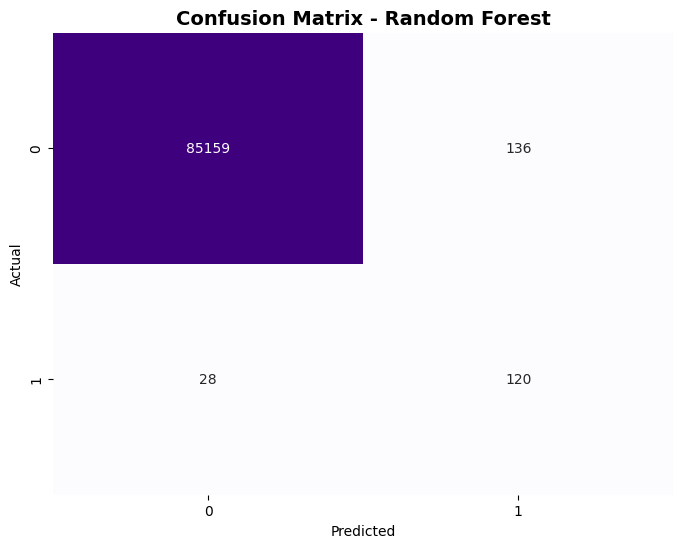

In [17]:
# Visualize Random Forest confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

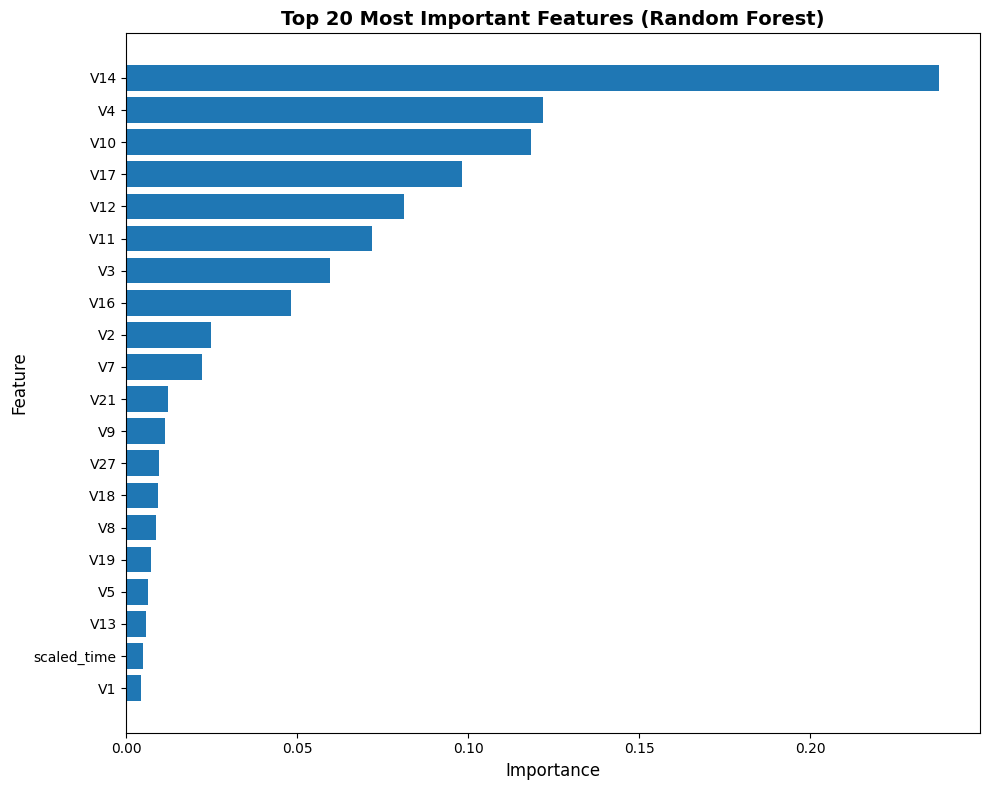


Top 10 Most Important Features:
   Feature  Importance
13     V14    0.237703
3       V4    0.121756
9      V10    0.118467
16     V17    0.098203
11     V12    0.081297
10     V11    0.071702
2       V3    0.059609
15     V16    0.048206
1       V2    0.024759
6       V7    0.022159


In [18]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
top_20_features = feature_importance.head(20)
plt.barh(top_20_features['Feature'], top_20_features['Importance'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

In [19]:
from xgboost import XGBClassifier

print("Training XGBoost model with balanced data...")
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

print("✅ XGBoost trained!")
print("\n" + "="*60)
print("XGBOOST PERFORMANCE")
print("="*60)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nAccuracy: {accuracy_xgb*100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Legitimate', 'Fraud']))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(f"True Positives (Caught frauds): {cm_xgb[1][1]}")
print(f"False Negatives (Missed frauds): {cm_xgb[1][0]}")
print(f"Recall: {cm_xgb[1][1]/(cm_xgb[1][1]+cm_xgb[1][0])*100:.2f}%")

Training XGBoost model with balanced data...
✅ XGBoost trained!

XGBOOST PERFORMANCE

Accuracy: 99.72%

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     85295
       Fraud       0.36      0.84      0.51       148

    accuracy                           1.00     85443
   macro avg       0.68      0.92      0.75     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
True Positives (Caught frauds): 124
False Negatives (Missed frauds): 24
Recall: 83.78%


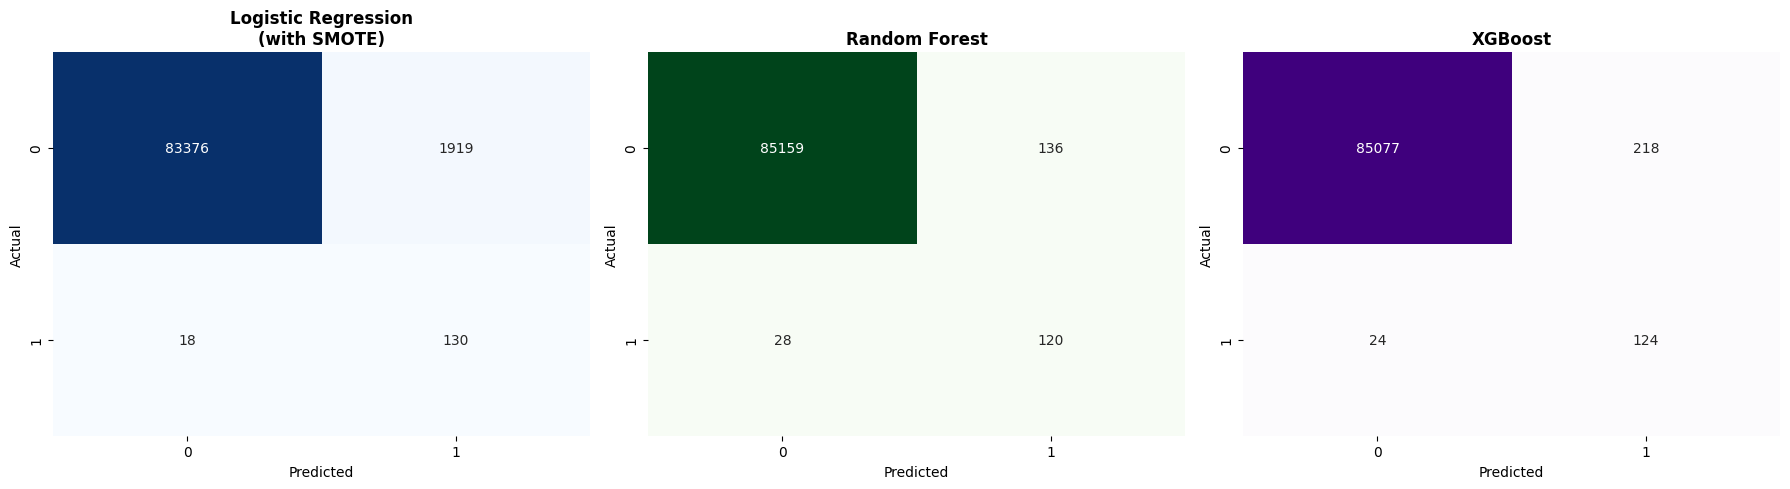

In [20]:
# Compare confusion matrices of all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = [
    ('Logistic Regression\n(with SMOTE)', cm_balanced, 'Blues'),
    ('Random Forest', cm_rf, 'Greens'),
    ('XGBoost', cm_xgb, 'Purples')
]

for idx, (title, cm, color) in enumerate(models):
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, cbar=False, ax=axes[idx])
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

In [21]:
# Create comprehensive comparison
models_comparison = pd.DataFrame({
    'Model': ['LR (No SMOTE)', 'LR + SMOTE', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy*100,
        accuracy_balanced*100,
        accuracy_rf*100,
        accuracy_xgb*100
    ],
    'Frauds Caught': [
        cm[1][1],
        cm_balanced[1][1],
        cm_rf[1][1],
        cm_xgb[1][1]
    ],
    'Frauds Missed': [
        cm[1][0],
        cm_balanced[1][0],
        cm_rf[1][0],
        cm_xgb[1][0]
    ],
    'Recall (%)': [
        cm[1][1]/(cm[1][1]+cm[1][0])*100,
        cm_balanced[1][1]/(cm_balanced[1][1]+cm_balanced[1][0])*100,
        cm_rf[1][1]/(cm_rf[1][1]+cm_rf[1][0])*100,
        cm_xgb[1][1]/(cm_xgb[1][1]+cm_xgb[1][0])*100
    ]
})

print("\n" + "="*80)
print("FINAL MODEL COMPARISON")
print("="*80)
print(models_comparison.to_string(index=False))

# Find best model by recall
best_model_idx = models_comparison['Recall (%)'].idxmax()
best_model = models_comparison.iloc[best_model_idx]
print(f"\n🏆 Best Model by Recall: {best_model['Model']}")
print(f"   Catching {best_model['Frauds Caught']:.0f} out of 148 frauds ({best_model['Recall (%)']:.2f}%)")


FINAL MODEL COMPARISON
        Model  Accuracy  Frauds Caught  Frauds Missed  Recall (%)
LR (No SMOTE) 99.915733            124             24   83.783784
   LR + SMOTE 97.732992            130             18   87.837838
Random Forest 99.808059            120             28   81.081081
      XGBoost 99.716770            124             24   83.783784

🏆 Best Model by Recall: LR + SMOTE
   Catching 130 out of 148 frauds (87.84%)


In [22]:
import joblib

# Save the Logistic Regression + SMOTE model (best recall)
joblib.dump(lr_model_balanced, '../models/lr_fraud_detector.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

print("✅ Models saved successfully!")
print("   - lr_fraud_detector.pkl")
print("   - scaler.pkl")

# Also save Random Forest (best balance)
joblib.dump(rf_model, '../models/rf_fraud_detector.pkl')
print("   - rf_fraud_detector.pkl")

✅ Models saved successfully!
   - lr_fraud_detector.pkl
   - scaler.pkl
   - rf_fraud_detector.pkl


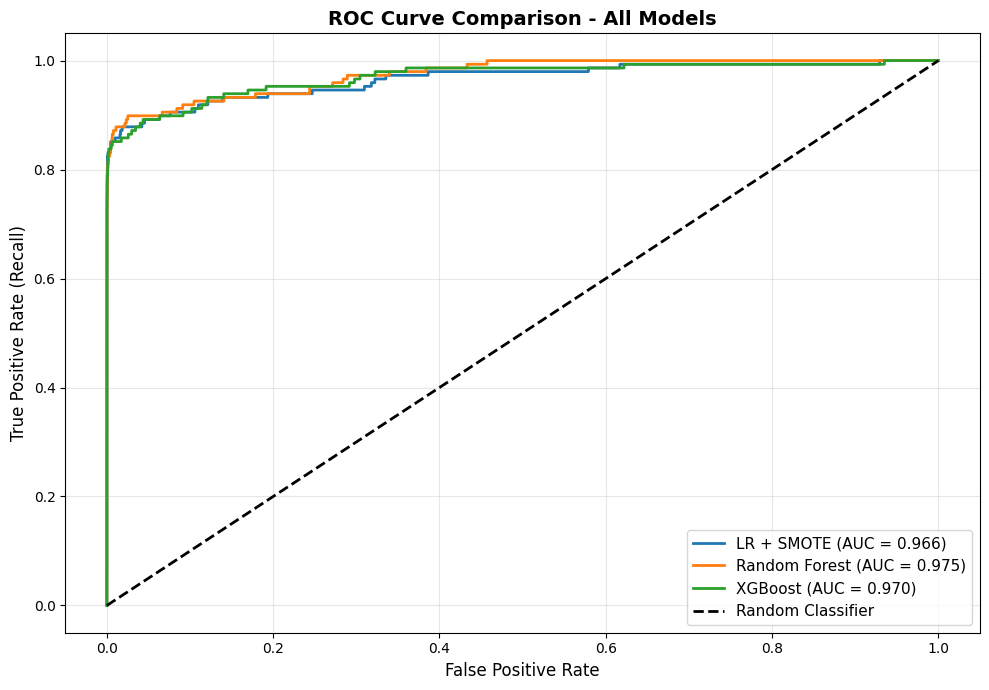


🎯 ROC-AUC Scores:
   LR + SMOTE:    0.9660
   Random Forest: 0.9747
   XGBoost:       0.9698


In [23]:
# Compare ROC curves for all models
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
y_pred_proba_lr = lr_model_balanced.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# Calculate AUC scores
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'LR + SMOTE (AUC = {auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve Comparison - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🎯 ROC-AUC Scores:")
print(f"   LR + SMOTE:    {auc_lr:.4f}")
print(f"   Random Forest: {auc_rf:.4f}")
print(f"   XGBoost:       {auc_xgb:.4f}")

In [24]:
print("\n" + "="*80)
print("PROJECT SUMMARY: CREDIT CARD FRAUD DETECTION")
print("="*80)

print("\n📊 DATASET:")
print(f"   Total transactions: 284,807")
print(f"   Fraudulent: 492 (0.173%)")
print(f"   Legitimate: 284,315 (99.827%)")
print(f"   Features: 30 (V1-V28, Time, Amount)")

print("\n🔧 PREPROCESSING:")
print(f"   ✓ Scaled Time and Amount features")
print(f"   ✓ Applied SMOTE to balance training data")
print(f"   ✓ Train-Test split: 70-30")

print("\n🤖 MODELS TESTED:")
print(f"   1. Logistic Regression (baseline)")
print(f"   2. Logistic Regression + SMOTE")
print(f"   3. Random Forest")
print(f"   4. XGBoost")

print("\n🏆 BEST RESULTS:")
print(f"   Best Recall: LR + SMOTE (87.84%) - Catches 130/148 frauds")
print(f"   Best Balance: Random Forest (81.08% recall, 47% precision)")
print(f"   Highest Accuracy: LR without SMOTE (99.92%)")

print("\n💡 KEY FINDINGS:")
print(f"   • SMOTE significantly improved fraud detection (61% → 88% recall)")
print(f"   • Most important features: V14, V17, V12, V10, V4")
print(f"   • Class imbalance is the main challenge")
print(f"   • Trade-off between catching frauds and false alarms")

print("\n📁 SAVED MODELS:")
print(f"   ✓ lr_fraud_detector.pkl (Best recall)")
print(f"   ✓ rf_fraud_detector.pkl (Best balance)")
print(f"   ✓ scaler.pkl")

print("\n✅ PROJECT COMPLETE!")
print("="*80)


PROJECT SUMMARY: CREDIT CARD FRAUD DETECTION

📊 DATASET:
   Total transactions: 284,807
   Fraudulent: 492 (0.173%)
   Legitimate: 284,315 (99.827%)
   Features: 30 (V1-V28, Time, Amount)

🔧 PREPROCESSING:
   ✓ Scaled Time and Amount features
   ✓ Applied SMOTE to balance training data
   ✓ Train-Test split: 70-30

🤖 MODELS TESTED:
   1. Logistic Regression (baseline)
   2. Logistic Regression + SMOTE
   3. Random Forest
   4. XGBoost

🏆 BEST RESULTS:
   Best Recall: LR + SMOTE (87.84%) - Catches 130/148 frauds
   Best Balance: Random Forest (81.08% recall, 47% precision)
   Highest Accuracy: LR without SMOTE (99.92%)

💡 KEY FINDINGS:
   • SMOTE significantly improved fraud detection (61% → 88% recall)
   • Most important features: V14, V17, V12, V10, V4
   • Class imbalance is the main challenge
   • Trade-off between catching frauds and false alarms

📁 SAVED MODELS:
   ✓ lr_fraud_detector.pkl (Best recall)
   ✓ rf_fraud_detector.pkl (Best balance)
   ✓ scaler.pkl

✅ PROJECT COMPLETE

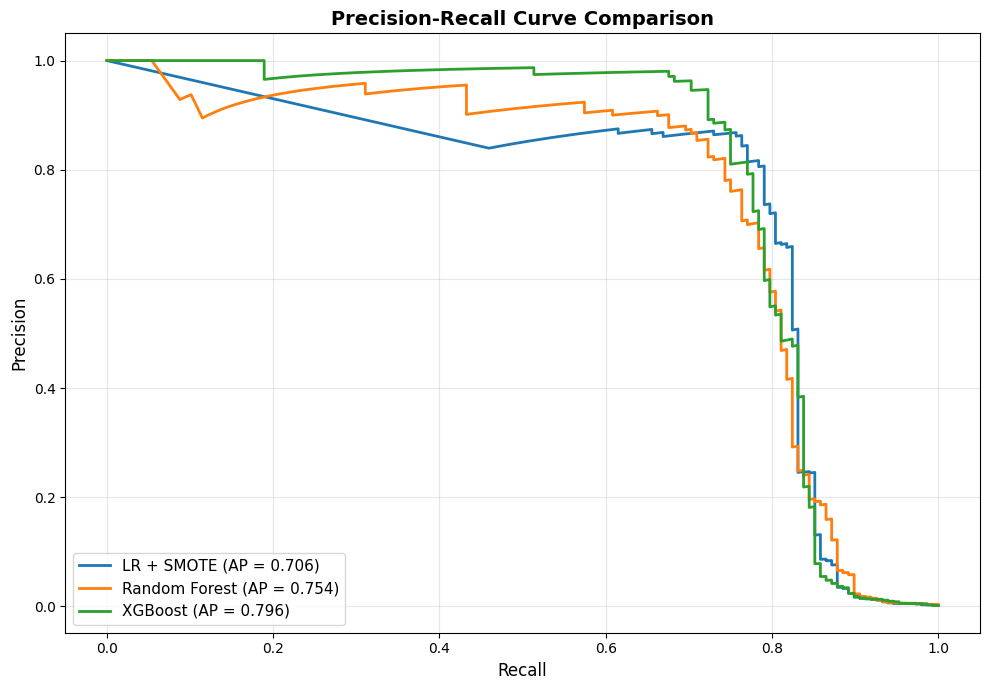

📊 Average Precision Scores:
   LR + SMOTE:    0.7062
   Random Forest: 0.7538
   XGBoost:       0.7958


In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curves for all models
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)

# Calculate average precision scores
ap_lr = average_precision_score(y_test, y_pred_proba_lr)
ap_rf = average_precision_score(y_test, y_pred_proba_rf)
ap_xgb = average_precision_score(y_test, y_pred_proba_xgb)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 7))
plt.plot(recall_lr, precision_lr, label=f'LR + SMOTE (AP = {ap_lr:.3f})', linewidth=2)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.3f})', linewidth=2)
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AP = {ap_xgb:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Average Precision Scores:")
print(f"   LR + SMOTE:    {ap_lr:.4f}")
print(f"   Random Forest: {ap_rf:.4f}")
print(f"   XGBoost:       {ap_xgb:.4f}")

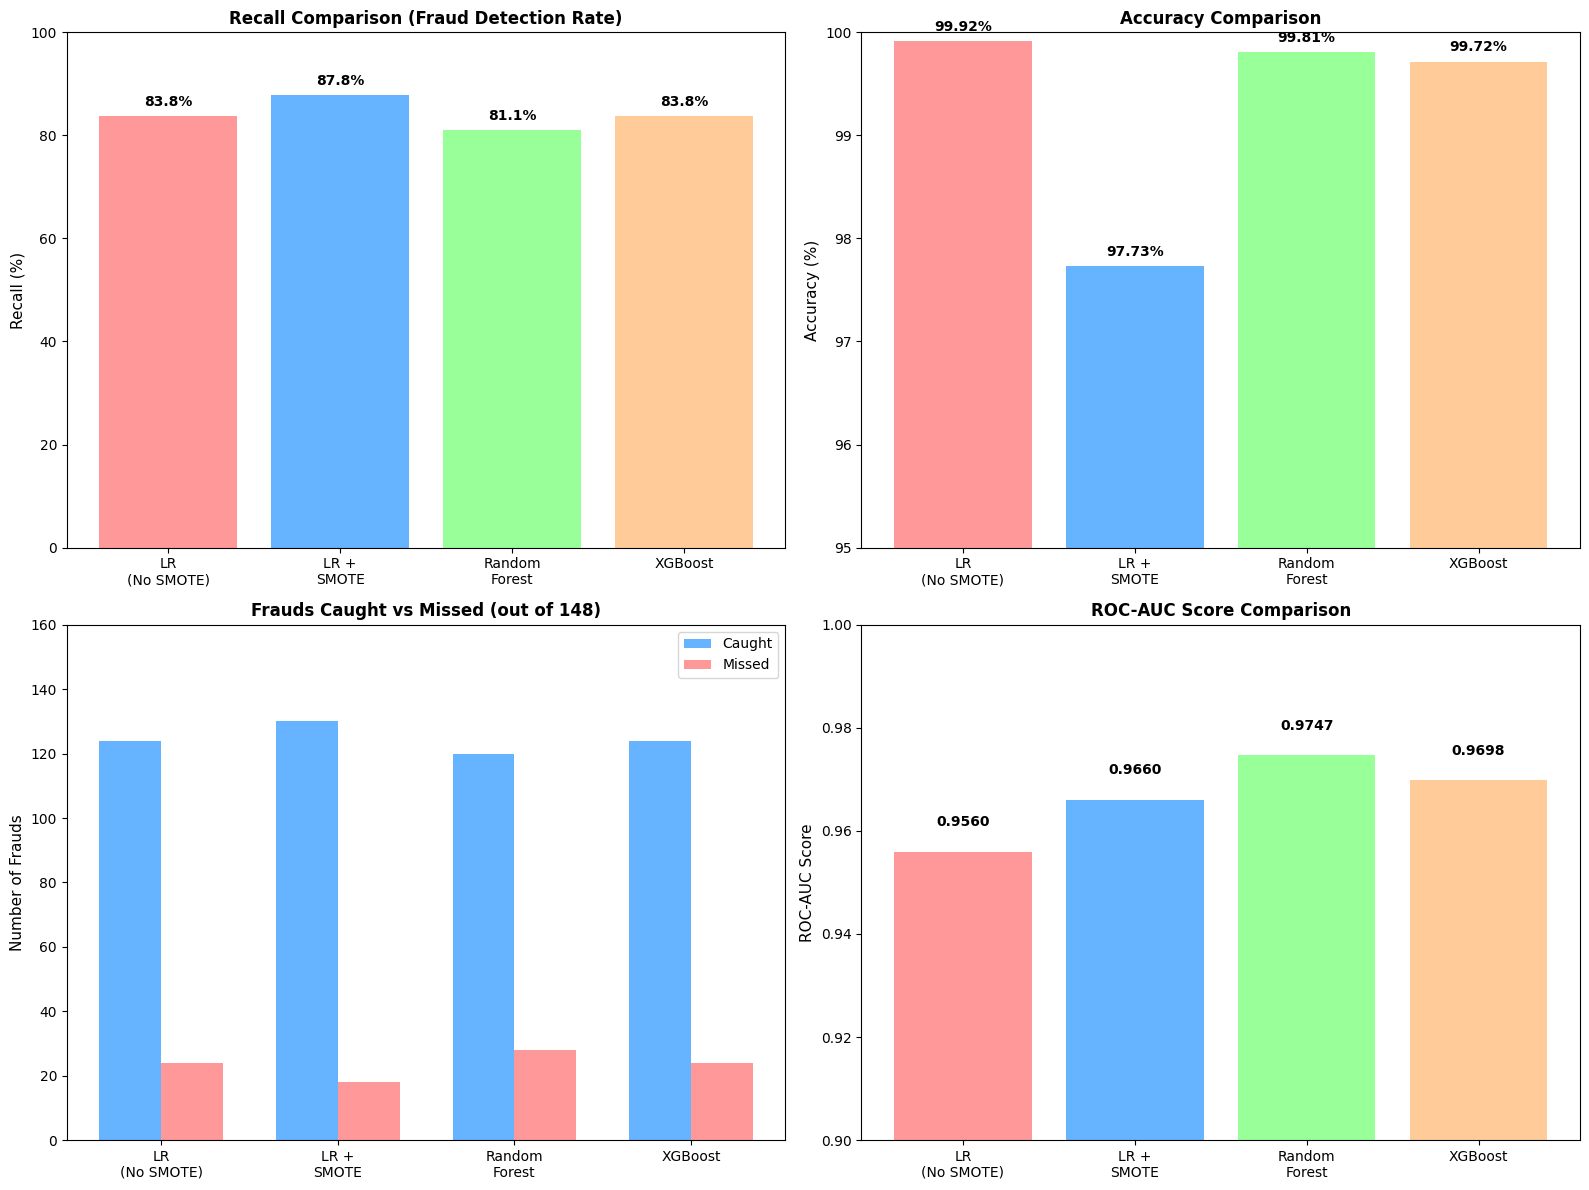

✅ Dashboard saved as 'model_comparison_dashboard.png'


In [26]:
# Create a comprehensive performance dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Recall Comparison
models_names = ['LR\n(No SMOTE)', 'LR +\nSMOTE', 'Random\nForest', 'XGBoost']
recall_scores = [
    cm[1][1]/(cm[1][1]+cm[1][0])*100,
    cm_balanced[1][1]/(cm_balanced[1][1]+cm_balanced[1][0])*100,
    cm_rf[1][1]/(cm_rf[1][1]+cm_rf[1][0])*100,
    cm_xgb[1][1]/(cm_xgb[1][1]+cm_xgb[1][0])*100
]
colors_recall = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[0, 0].bar(models_names, recall_scores, color=colors_recall)
axes[0, 0].set_title('Recall Comparison (Fraud Detection Rate)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Recall (%)', fontsize=11)
axes[0, 0].set_ylim([0, 100])
for i, v in enumerate(recall_scores):
    axes[0, 0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# 2. Accuracy Comparison
accuracy_scores = [
    accuracy*100,
    accuracy_balanced*100,
    accuracy_rf*100,
    accuracy_xgb*100
]
axes[0, 1].bar(models_names, accuracy_scores, color=colors_recall)
axes[0, 1].set_title('Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Accuracy (%)', fontsize=11)
axes[0, 1].set_ylim([95, 100])
for i, v in enumerate(accuracy_scores):
    axes[0, 1].text(i, v + 0.1, f'{v:.2f}%', ha='center', fontweight='bold')

# 3. Frauds Caught vs Missed
frauds_caught = [cm[1][1], cm_balanced[1][1], cm_rf[1][1], cm_xgb[1][1]]
frauds_missed = [cm[1][0], cm_balanced[1][0], cm_rf[1][0], cm_xgb[1][0]]
x = np.arange(len(models_names))
width = 0.35
axes[1, 0].bar(x - width/2, frauds_caught, width, label='Caught', color='#66b3ff')
axes[1, 0].bar(x + width/2, frauds_missed, width, label='Missed', color='#ff9999')
axes[1, 0].set_title('Frauds Caught vs Missed (out of 148)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Frauds', fontsize=11)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models_names)
axes[1, 0].legend()
axes[1, 0].set_ylim([0, 160])

# 4. ROC-AUC Comparison
auc_scores = [roc_auc, auc_lr, auc_rf, auc_xgb]
axes[1, 1].bar(models_names, auc_scores, color=colors_recall)
axes[1, 1].set_title('ROC-AUC Score Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('ROC-AUC Score', fontsize=11)
axes[1, 1].set_ylim([0.9, 1.0])
for i, v in enumerate(auc_scores):
    axes[1, 1].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Dashboard saved as 'model_comparison_dashboard.png'")

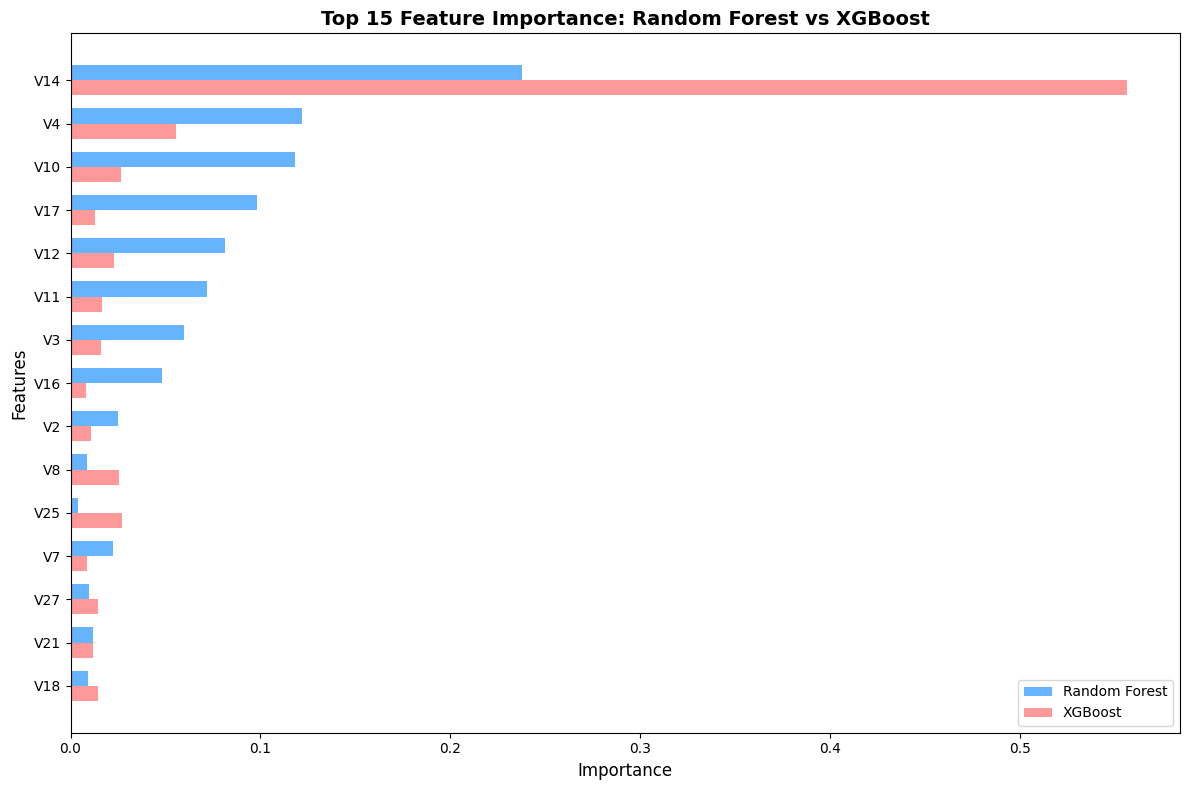

✅ Feature comparison saved as 'feature_importance_comparison.png'


In [27]:
# Compare feature importance between Random Forest and XGBoost
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'RF_Importance': rf_model.feature_importances_
})

feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'XGB_Importance': xgb_model.feature_importances_
})

# Merge and get top 15
feature_comparison = feature_importance_rf.merge(feature_importance_xgb, on='Feature')
feature_comparison['Avg_Importance'] = (feature_comparison['RF_Importance'] + 
                                         feature_comparison['XGB_Importance']) / 2
feature_comparison = feature_comparison.sort_values('Avg_Importance', ascending=False).head(15)

# Plot comparison
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(feature_comparison))
width = 0.35

ax.barh(x - width/2, feature_comparison['RF_Importance'], width, 
        label='Random Forest', color='#66b3ff')
ax.barh(x + width/2, feature_comparison['XGB_Importance'], width, 
        label='XGBoost', color='#ff9999')

ax.set_ylabel('Features', fontsize=12)
ax.set_xlabel('Importance', fontsize=12)
ax.set_title('Top 15 Feature Importance: Random Forest vs XGBoost', 
             fontsize=14, fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(feature_comparison['Feature'])
ax.legend()
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Feature comparison saved as 'feature_importance_comparison.png'")

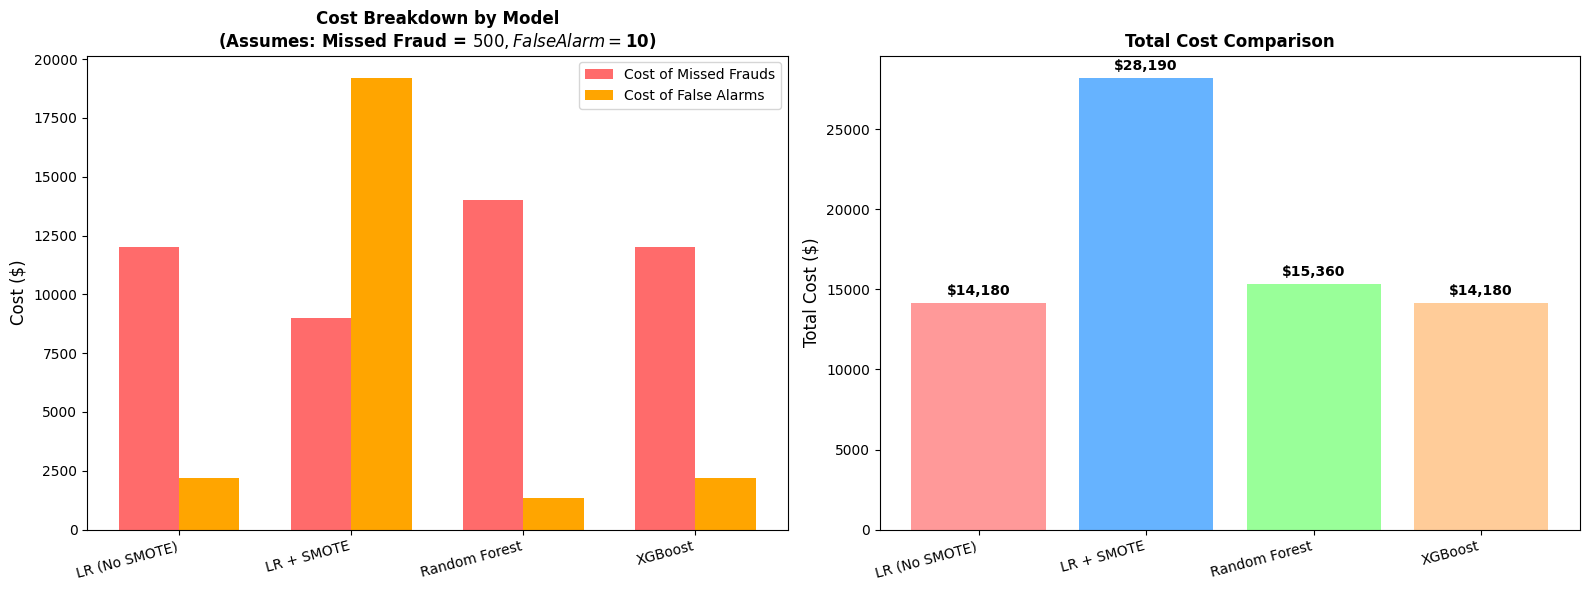


💰 COST-BENEFIT ANALYSIS:
        Model  Missed Frauds  False Alarms  Cost (Missed)  Cost (Alarms)  Total Cost
LR (No SMOTE)             24           218          12000           2180       14180
   LR + SMOTE             18          1919           9000          19190       28190
Random Forest             28           136          14000           1360       15360
      XGBoost             24           218          12000           2180       14180

✅ Cost analysis saved as 'cost_benefit_analysis.png'


In [28]:
# Simulate cost-benefit analysis
# Assume: Missing 1 fraud costs $500, False alarm costs $10

models_cost_analysis = []

for model_name, cm_matrix in [
    ('LR (No SMOTE)', cm),
    ('LR + SMOTE', cm_balanced),
    ('Random Forest', cm_rf),
    ('XGBoost', cm_xgb)
]:
    false_negatives = cm_matrix[1][0]  # Missed frauds
    false_positives = cm_matrix[0][1]  # False alarms
    
    cost_missed_fraud = false_negatives * 500
    cost_false_alarms = false_positives * 10
    total_cost = cost_missed_fraud + cost_false_alarms
    
    models_cost_analysis.append({
        'Model': model_name,
        'Missed Frauds': false_negatives,
        'False Alarms': false_positives,
        'Cost (Missed)': cost_missed_fraud,
        'Cost (Alarms)': cost_false_alarms,
        'Total Cost': total_cost
    })

cost_df = pd.DataFrame(models_cost_analysis)

# Visualize costs
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Cost breakdown
x = np.arange(len(cost_df))
width = 0.35
axes[0].bar(x - width/2, cost_df['Cost (Missed)'], width, 
            label='Cost of Missed Frauds', color='#ff6b6b')
axes[0].bar(x + width/2, cost_df['Cost (Alarms)'], width, 
            label='Cost of False Alarms', color='#ffa500')
axes[0].set_ylabel('Cost ($)', fontsize=12)
axes[0].set_title('Cost Breakdown by Model\n(Assumes: Missed Fraud = $500, False Alarm = $10)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(cost_df['Model'], rotation=15, ha='right')
axes[0].legend()

# Total cost comparison
colors_cost = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[1].bar(cost_df['Model'], cost_df['Total Cost'], color=colors_cost)
axes[1].set_ylabel('Total Cost ($)', fontsize=12)
axes[1].set_title('Total Cost Comparison', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(cost_df['Model'], rotation=15, ha='right')
for i, v in enumerate(cost_df['Total Cost']):
    axes[1].text(i, v + 500, f'${v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('cost_benefit_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💰 COST-BENEFIT ANALYSIS:")
print("="*70)
print(cost_df.to_string(index=False))
print("="*70)
print("\n✅ Cost analysis saved as 'cost_benefit_analysis.png'")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Recreate your exact preprocessing
df = pd.read_csv('import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Recreate your exact preprocessing
df = pd.read_csv('import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Recreate your exact preprocessing
df = pd.read_csv('data/creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# Scale
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['scaled_time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))
X = X.drop(['Amount', 'Time'], axis=1)

# Same split you used originally
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Create demo files from test set
# Small demo (20 transactions)
demo_small = X_test.sample(n=20, random_state=999)
demo_small.to_csv('demo_batch_small.csv', index=False)

# Medium demo (50 transactions)
demo_medium = X_test.sample(n=50, random_state=888)
demo_medium.to_csv('demo_batch_medium.csv', index=False)

print("✅ Created demo files from test set:")
print(f"   - demo_batch_small.csv: {len(demo_small)} transactions")
print(f"   - demo_batch_medium.csv: {len(demo_medium)} transactions")

# Show actual fraud counts
print(f"\nActual frauds in small batch: {y_test.loc[demo_small.index].sum()}")
print(f"Actual frauds in medium batch: {y_test.loc[demo_medium.index].sum()}"')
X = df.drop('Class', axis=1)
y = df['Class']

# Scale
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['scaled_time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))
X = X.drop(['Amount', 'Time'], axis=1)

# Same split you used originally
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Create demo files from test set
# Small demo (20 transactions)
demo_small = X_test.sample(n=20, random_state=999)
demo_small.to_csv('demo_batch_small.csv', index=False)

# Medium demo (50 transactions)
demo_medium = X_test.sample(n=50, random_state=888)
demo_medium.to_csv('demo_batch_medium.csv', index=False)

print("✅ Created demo files from test set:")
print(f"   - demo_batch_small.csv: {len(demo_small)} transactions")
print(f"   - demo_batch_medium.csv: {len(demo_medium)} transactions")

# Show actual fraud counts
print(f"\nActual frauds in small batch: {y_test.loc[demo_small.index].sum()}")
print(f"Actual frauds in medium batch: {y_test.loc[demo_medium.index].sum()}")')
X = df.drop('Class', axis=1)
y = df['Class']

# Scale
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['scaled_time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))
X = X.drop(['Amount', 'Time'], axis=1)

# Same split you used originally
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Create demo files from test set
# Small demo (20 transactions)
demo_small = X_test.sample(n=20, random_state=999)
demo_small.to_csv('demo_batch_small.csv', index=False)

# Medium demo (50 transactions)
demo_medium = X_test.sample(n=50, random_state=888)
demo_medium.to_csv('demo_batch_medium.csv', index=False)

print("✅ Created demo files from test set:")
print(f"   - demo_batch_small.csv: {len(demo_small)} transactions")
print(f"   - demo_batch_medium.csv: {len(demo_medium)} transactions")

# Show actual fraud counts
print(f"\nActual frauds in small batch: {y_test.loc[demo_small.index].sum()}")
print(f"Actual frauds in medium batch: {y_test.loc[demo_medium.index].sum()}")